In [1]:
# importing the general dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import warnings
from PIL import Image, ImageDraw
from scipy import misc
import random

In [ ]:
!pip install kaggle
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d fatihkgg/affectnet-yolo-format
!unzip affectnet-yolo-format.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
def replace_with_random_box(image):
    # Get image size
    width, height = image.size
    # Define minimum and maximum box size ratios
    min_ratio, max_ratio = 0.2, 0.4
    # Calculate minimum and maximum box sizes
    min_box_size = min(width, height) * min_ratio
    max_box_size = min(width, height) * max_ratio
    # Randomly choose box size
    box_size = random.uniform(min_box_size, max_box_size)
    # Randomly choose box position
    x = random.randint(0, width - int(box_size))
    y = random.randint(0, height - int(box_size))
    # Randomly choose box color
    box_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    # Replace the pixels within the box with the box color
    box = np.array([box_color], dtype=np.uint8)
    image_array = np.array(image)
    image_array[y:y+int(box_size), x:x+int(box_size)] = box
    # Convert the modified array back to an image
    modified_image = Image.fromarray(image_array)
    return modified_image

def replace_with_random_box_in_images(input_dir):
    # Function to replace parts of images with a random box and replace the original image
    def replace_with_random_box_image(image_path):
        img = Image.open(image_path)
        # Replace parts of the image with a random box
        modified_img = replace_with_random_box(img)
        # Save the modified image, overwriting the original image
        modified_img.save(image_path)

    # Loop through all image files in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            input_path = os.path.join(input_dir, filename)
            replace_with_random_box_image(input_path)

    print("Images have been replaced with random boxes and replaced in", input_dir)


In [4]:
train_dir = 'YOLO_format/train/images'
val_dir= 'YOLO_format/valid/images'
test_dir = 'YOLO_format/test/images'


replace_with_random_box_in_images(train_dir)
replace_with_random_box_in_images(val_dir)
replace_with_random_box_in_images(test_dir)

Images have been replaced with random boxes and replaced in YOLO_format/train/images
Images have been replaced with random boxes and replaced in YOLO_format/valid/images
Images have been replaced with random boxes and replaced in YOLO_format/test/images


['image0022879.jpg', 'ffhq_1016.png', 'image0026679.jpg', 'ffhq_2915.png', 'ffhq_4383.png', 'image0039176.jpg', 'image0013975.jpg', 'image0034106.jpg', 'image0041454.jpg', 'image0038039.jpg', 'ffhq_1482.png', 'ffhq_1967.png', 'image0042281.jpg', 'ffhq_3882.png', 'image0020561.jpg', 'image0042356.jpg', 'image0028186.jpg', 'image0032768.jpg', 'image0023439.jpg', 'image0032021.jpg', 'image0027116.jpg', 'ffhq_3893.png', 'image0033101.jpg', 'image0037820.jpg', 'image0036232.jpg', 'image0029948.jpg', 'image0031230.jpg', 'image0027077.jpg', 'image0026647.jpg', 'image0025591.jpg', 'ffhq_5066.png', 'image0028705.jpg', 'image0028341.jpg', 'image0037784.jpg', 'image0028207.jpg', 'image0020007.jpg', 'image0040858.jpg', 'image0027189.jpg', 'image0009395.jpg', 'image0019231.jpg', 'image0038142.jpg', 'image0031499.jpg', 'image0017844.jpg', 'image0030589.jpg', 'ffhq_4080.png', 'image0037674.jpg', 'ffhq_5401.png', 'ffhq_2908.png', 'image0013783.jpg', 'ffhq_3561.png', 'image0039254.jpg', 'ffhq_1595.png'

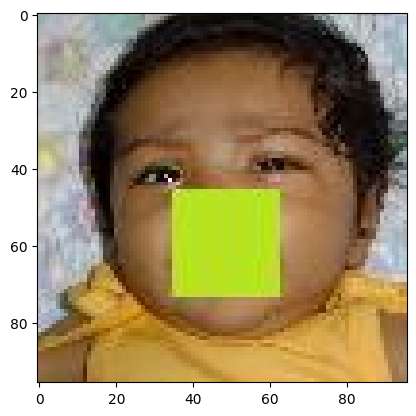

In [5]:
images = os.listdir(train_dir)
image = Image.open('YOLO_format/train/images/'+ images[5])
plt.imshow(image)
print(images)

In [6]:
import yaml
# Define your data
data = {
    'data': 'YOLO_format',
    'train': 'YOLO_format/train/images',
    'val': 'YOLO_format/valid/images',
    'test': 'YOLO_format/test/images',
    'nc': 8,
    'names': [
        "Anger",
        "Contempt",
        "Disgust",
        "Fear",
        "Happy",
        "Neutral",
        "Sad",
        "Surprise",
    ],
    'network': 'yolov8n'
}

# Specify the file path
file_path = '/content/yolo_config.yaml'

# Write the data to a YAML file
with open(file_path, 'w') as file:
    yaml.dump(data, file)

In [ ]:
# Lets check what we have in our dataset
dataset_root = 'YOLO_format/'
for root, directories, files in os.walk(dataset_root):
    # Do something with the current directory path 'root'
    print("Current directory:", root)
    # Do something with the list of subdirectories 'directories'
    print("Subdirectories:", directories)
    # Do something with the list of files 'files'
    print("Files:", len(files))

In [ ]:
!pip install ultralytics

In [8]:
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [9]:
model = YOLO('yolov8n.pt')
os.environ["WANDB_MODE"] = "disabled"

100%|██████████| 6.23M/6.23M [00:00<00:00, 122MB/s]


In [11]:
yaml_path = '/content/yolo_config.yaml'
model.train(
    data=yaml_path,
    epochs=18,
    batch=8,
    name='occulation_model',
    imgsz=640)

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/yolo_config.yaml, epochs=18, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=occulation_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 25.6MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/YOLO_format/train/labels... 17101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17101/17101 [00:18<00:00, 924.16it/s]


train: New cache created: /content/YOLO_format/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/YOLO_format/valid/labels... 5406 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5406/5406 [00:04<00:00, 1144.47it/s]


val: New cache created: /content/YOLO_format/valid/labels.cache
Plotting labels to runs/detect/occulation_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/occulation_model
Starting training for 18 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/18      1.42G     0.1435          2     0.9424         15        640: 100%|██████████| 2138/2138 [06:44<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:47<00:00,  7.18it/s]

                   all       5406       5406      0.233      0.635      0.321       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/18      1.25G    0.09461      1.553      0.902         20        640: 100%|██████████| 2138/2138 [06:16<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:47<00:00,  7.17it/s]

                   all       5406       5406      0.287      0.682      0.376      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/18      1.24G    0.08629      1.471     0.8986         19        640: 100%|██████████| 2138/2138 [06:25<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:48<00:00,  7.00it/s]

                   all       5406       5406      0.287      0.655      0.409      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/18      1.24G     0.0773      1.428     0.8975         13        640: 100%|██████████| 2138/2138 [06:25<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:48<00:00,  7.00it/s]

                   all       5406       5406      0.339      0.617      0.452      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/18      1.24G    0.06944      1.398     0.8944         17        640: 100%|██████████| 2138/2138 [06:17<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:47<00:00,  7.19it/s]


                   all       5406       5406      0.368      0.648      0.475      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/18      1.24G        inf      1.372      0.891         14        640: 100%|██████████| 2138/2138 [06:22<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:47<00:00,  7.14it/s]

                   all       5406       5406      0.396      0.667      0.517      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/18      1.24G    0.06095      1.355     0.8922         14        640: 100%|██████████| 2138/2138 [06:21<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:46<00:00,  7.23it/s]

                   all       5406       5406      0.435      0.652      0.523      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/18      1.24G    0.05618      1.333     0.8898         15        640: 100%|██████████| 2138/2138 [06:20<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:48<00:00,  6.99it/s]

                   all       5406       5406      0.426      0.694      0.545      0.545


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/18      1.38G     0.0472      1.132     0.9089          5        640: 100%|██████████| 2138/2138 [06:04<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:47<00:00,  7.09it/s]

                   all       5406       5406      0.456      0.658      0.562      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/18      1.24G    0.03995      1.082     0.9012          5        640: 100%|██████████| 2138/2138 [05:59<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:48<00:00,  6.96it/s]

                   all       5406       5406      0.517      0.652      0.593      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/18      1.24G    0.03376      1.037     0.9009          5        640: 100%|██████████| 2138/2138 [05:58<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:48<00:00,  7.04it/s]

                   all       5406       5406      0.561      0.643      0.624      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/18      1.24G    0.03219     0.9955     0.9012          5        640: 100%|██████████| 2138/2138 [05:56<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:48<00:00,  7.04it/s]

                   all       5406       5406      0.555       0.68      0.645      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/18      1.24G    0.03011       0.96     0.9009          5        640: 100%|██████████| 2138/2138 [05:54<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:47<00:00,  7.09it/s]

                   all       5406       5406      0.582      0.671      0.665      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/18      1.24G    0.02763     0.9211     0.9006          5        640: 100%|██████████| 2138/2138 [05:46<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:47<00:00,  7.13it/s]

                   all       5406       5406      0.606      0.659      0.676      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/18      1.24G    0.02545     0.8843     0.8994          5        640: 100%|██████████| 2138/2138 [05:50<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:46<00:00,  7.22it/s]

                   all       5406       5406      0.583      0.699       0.69       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/18      1.24G    0.02389      0.854      0.898          5        640: 100%|██████████| 2138/2138 [05:47<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:47<00:00,  7.17it/s]

                   all       5406       5406      0.619      0.678      0.695      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/18      1.24G    0.02244     0.8218     0.8964          5        640: 100%|██████████| 2138/2138 [05:43<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:47<00:00,  7.17it/s]

                   all       5406       5406      0.619      0.684        0.7        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/18      1.24G    0.02097     0.7984     0.8978          5        640: 100%|██████████| 2138/2138 [05:50<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:47<00:00,  7.05it/s]

                   all       5406       5406      0.622      0.691      0.709      0.709



18 epochs completed in 2.079 hours.
Optimizer stripped from runs/detect/occulation_model/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/occulation_model/weights/best.pt, 6.3MB

Validating runs/detect/occulation_model/weights/best.pt...
Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 338/338 [00:49<00:00,  6.85it/s]


                   all       5406       5406      0.623      0.691      0.709      0.709
                 Anger       5406        712      0.565      0.673      0.674      0.674
              Contempt       5406        618      0.674      0.681      0.747      0.747
               Disgust       5406        672      0.579      0.625      0.643      0.643
                  Fear       5406        622      0.654       0.67      0.725      0.725
                 Happy       5406        791      0.817      0.867      0.925      0.925
               Neutral       5406        514       0.54      0.623      0.602      0.602
                   Sad       5406        603      0.538      0.637      0.603      0.603
              Surprise       5406        874      0.614      0.752      0.751      0.751
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/occulation_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e31ee52c1f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [12]:
os.listdir('runs/detect/occulation_model')

['results.png',
 'F1_curve.png',
 'train_batch0.jpg',
 'args.yaml',
 'events.out.tfevents.1714552263.380d9c123f1c.1128.0',
 'val_batch1_pred.jpg',
 'results.csv',
 'labels.jpg',
 'val_batch0_pred.jpg',
 'train_batch17105.jpg',
 'val_batch0_labels.jpg',
 'confusion_matrix.png',
 'val_batch2_pred.jpg',
 'train_batch17104.jpg',
 'confusion_matrix_normalized.png',
 'PR_curve.png',
 'train_batch1.jpg',
 'val_batch1_labels.jpg',
 'weights',
 'R_curve.png',
 'train_batch17106.jpg',
 'labels_correlogram.jpg',
 'P_curve.png',
 'val_batch2_labels.jpg',
 'train_batch2.jpg']

In [13]:
os.listdir('runs/detect/occulation_model/weights')

['best.pt', 'last.pt']

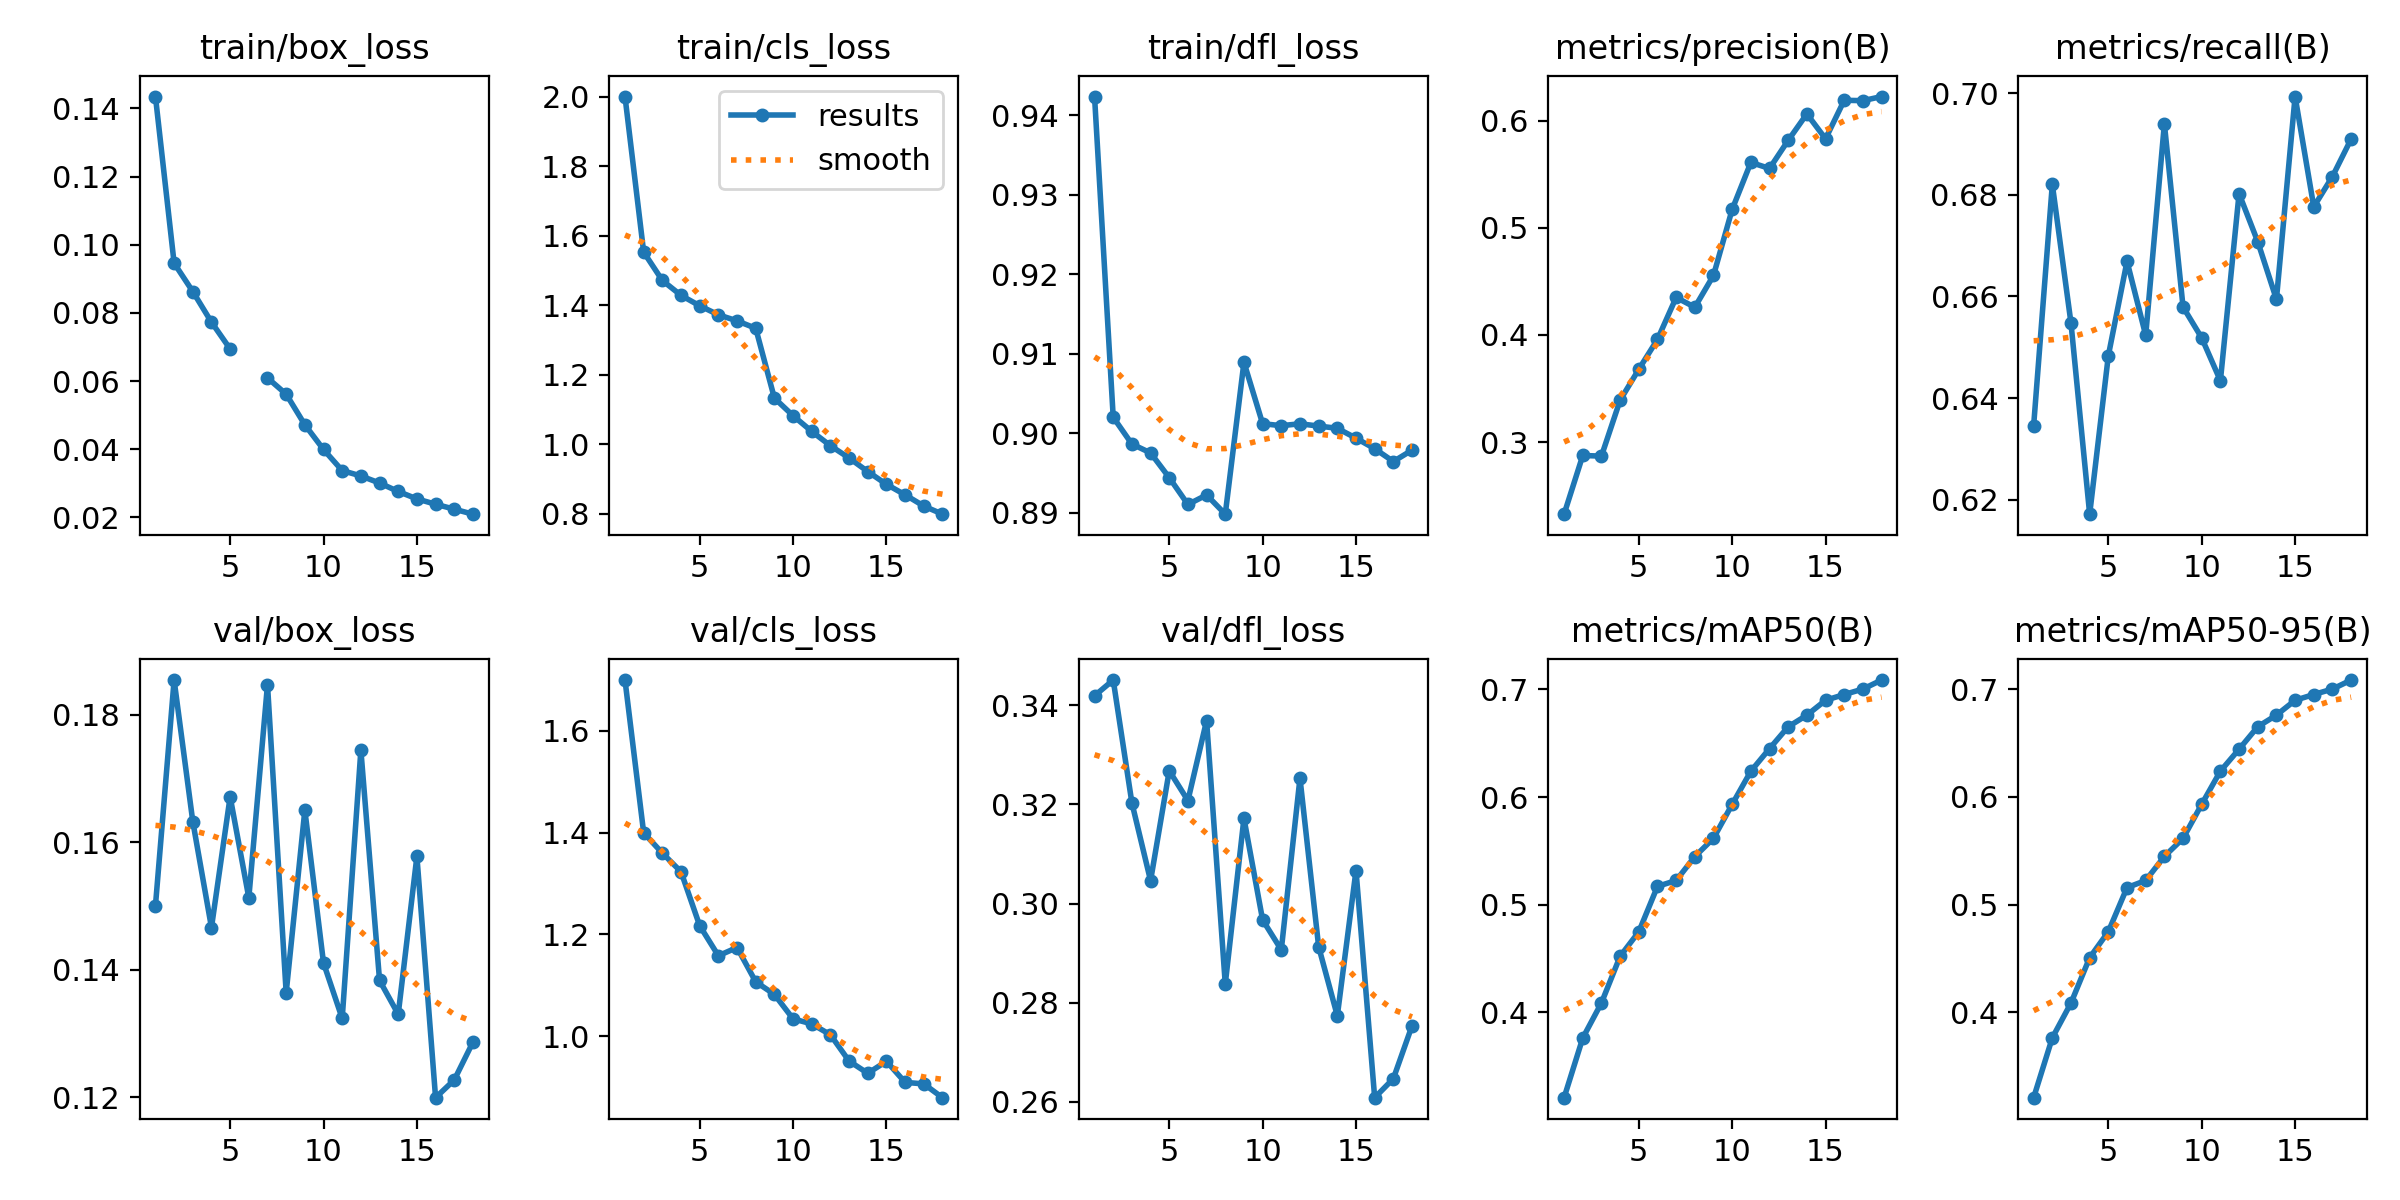

In [14]:
Image(filename=f"runs/detect/occulation_model/results.png", width=1000)

In [15]:
from google.colab import files
files.download('runs/detect/occulation_model/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_model = YOLO('runs/detect/occulation_model/weights/best.pt')
test_model.predict(source='/content/YOLO_format/test/images')